In [23]:
from google.colab import files
uploaded = files.upload()

Saving archive (1).zip to archive (1) (1).zip


In [24]:
import pandas as pd
import zipfile
import os

In [25]:
# Step 3: Extract and Load Dataset
zip_filename = list(uploaded.keys())[0]
extract_dir = "/content/weather_data"
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_filename, "r") as zip_ref:
    zip_ref.extractall(extract_dir)

file_path = os.path.join(extract_dir, "philippines_typhoon_monthly_2014_2024.csv")
data = pd.read_csv(file_path)

In [26]:
print("📊 RAW DATA OVERVIEW")
display(data.head())
print("\nDataset Info:")
data.info()

📊 RAW DATA OVERVIEW


,Year,Month,Number_of_Typhoons,ONI,Nino3.4_SST_anomaly,Western_Pacific_SST,Vertical_Wind_Shear,Midlevel_Humidity,SeaLevelPressure,MJO_Phase,Prev_month_typhoons
0,2014,1,1,0.03,-0.05,0.36,13.2,54.8,1009.8,0,0
1,2014,2,0,0.20,0.18,-0.43,13.8,59.5,1009.5,7,1
2,2014,3,0,0.02,0.00,0.01,13.0,49.3,1009.4,6,0
3,2014,4,0,0.13,0.07,-0.15,10.7,57.8,1008.2,0,0
4,2014,5,0,-0.03,-0.05,-0.41,11.1,61.4,1008.1,3,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 132 non-null    int64  
 1   Month                132 non-null    int64  
 2   Number_of_Typhoons   132 non-null    int64  
 3   ONI                  132 non-null    float64
 4   Nino3.4_SST_anomaly  132 non-null    float64
 5   Western_Pacific_SST  132 non-null    float64
 6   Vertical_Wind_Shear  132 non-null    float64
 7   Midlevel_Humidity    132 non-null    float64
 8   SeaLevelPressure     132 non-null    float64
 9   MJO_Phase            132 non-null    int64  
 10  Prev_month_typhoons  132 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 11.5 KB


# **Data Cleaning**

In [27]:
#Remove spaces or invisible characters from column names
data.columns = data.columns.str.strip()

In [28]:
#Drop duplicate rows (if any)
data = data.drop_duplicates()

In [29]:
# If numeric → replace with mean; if categorical → replace with mode
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].mean())

In [30]:
#Convert appropriate columns to numeric (if applicable)
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='ignore')

/tmp/ipython-input-2324073355.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors='ignore')


In [31]:
#Summary after cleaning
print("Data Cleaning Completed!")
print("Shape:", data.shape)
print("Missing values per column:\n", data.isnull().sum())

Data Cleaning Completed!
Shape: (132, 11)
Missing values per column:
 Year                   0
Month                  0
Number_of_Typhoons     0
ONI                    0
Nino3.4_SST_anomaly    0
Western_Pacific_SST    0
Vertical_Wind_Shear    0
Midlevel_Humidity      0
SeaLevelPressure       0
MJO_Phase              0
Prev_month_typhoons    0
dtype: int64


In [32]:
#Show a sample of cleaned data
data.head()

,Year,Month,Number_of_Typhoons,ONI,Nino3.4_SST_anomaly,Western_Pacific_SST,Vertical_Wind_Shear,Midlevel_Humidity,SeaLevelPressure,MJO_Phase,Prev_month_typhoons
0,2014,1,1,0.03,-0.05,0.36,13.2,54.8,1009.8,0,0
1,2014,2,0,0.20,0.18,-0.43,13.8,59.5,1009.5,7,1
2,2014,3,0,0.02,0.00,0.01,13.0,49.3,1009.4,6,0
3,2014,4,0,0.13,0.07,-0.15,10.7,57.8,1008.2,0,0
4,2014,5,0,-0.03,-0.05,-0.41,11.1,61.4,1008.1,3,0


# **Data Transformation**

In [33]:
import numpy as np

In [34]:
# Identify numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [35]:
# Apply log transformation to positively skewed data
for col in numeric_cols:
    if (data[col] > 0).all():
        data[f"log_{col}"] = np.log1p(data[col])

# **Data Reduction**

In [36]:
# Drop irrelevant columns (example: unnamed, id, etc.)
columns_to_drop = [col for col in data.columns if 'Unnamed' in col or 'id' in col.lower()]
data_reduced = data.drop(columns=columns_to_drop, axis=1)

In [37]:
data_reduced.to_csv("/content/reduced_weather_data.csv", index=False)
print("✅ Data Reduction Completed!")
print("💾 Reduced dataset saved as 'reduced_weather_data.csv'")
print("Remaining columns:", list(data_reduced.columns))

✅ Data Reduction Completed!
💾 Reduced dataset saved as 'reduced_weather_data.csv'
Remaining columns: ['Year', 'Month', 'Number_of_Typhoons', 'ONI', 'Nino3.4_SST_anomaly', 'Western_Pacific_SST', 'Vertical_Wind_Shear', 'SeaLevelPressure', 'MJO_Phase', 'Prev_month_typhoons', 'log_Year', 'log_Month', 'log_Vertical_Wind_Shear', 'log_SeaLevelPressure']


In [38]:
data_reduced.head()

,Year,Month,Number_of_Typhoons,ONI,Nino3.4_SST_anomaly,Western_Pacific_SST,Vertical_Wind_Shear,SeaLevelPressure,MJO_Phase,Prev_month_typhoons,log_Year,log_Month,log_Vertical_Wind_Shear,log_SeaLevelPressure
0,2014,1,1,0.03,-0.05,0.36,13.2,1009.8,0,0,7.608374,0.693147,2.653242,6.918497
1,2014,2,0,0.20,0.18,-0.43,13.8,1009.5,7,1,7.608374,1.098612,2.694627,6.918201
2,2014,3,0,0.02,0.00,0.01,13.0,1009.4,6,0,7.608374,1.386294,2.639057,6.918102
3,2014,4,0,0.13,0.07,-0.15,10.7,1008.2,0,0,7.608374,1.609438,2.459589,6.916913
4,2014,5,0,-0.03,-0.05,-0.41,11.1,1008.1,3,0,7.608374,1.791759,2.493205,6.916814


# **10 Visualization**

# **1. Histogram of typhoon counts per year.**

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-2350597044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Number_of_Typhoons', data=data, palette='viridis')


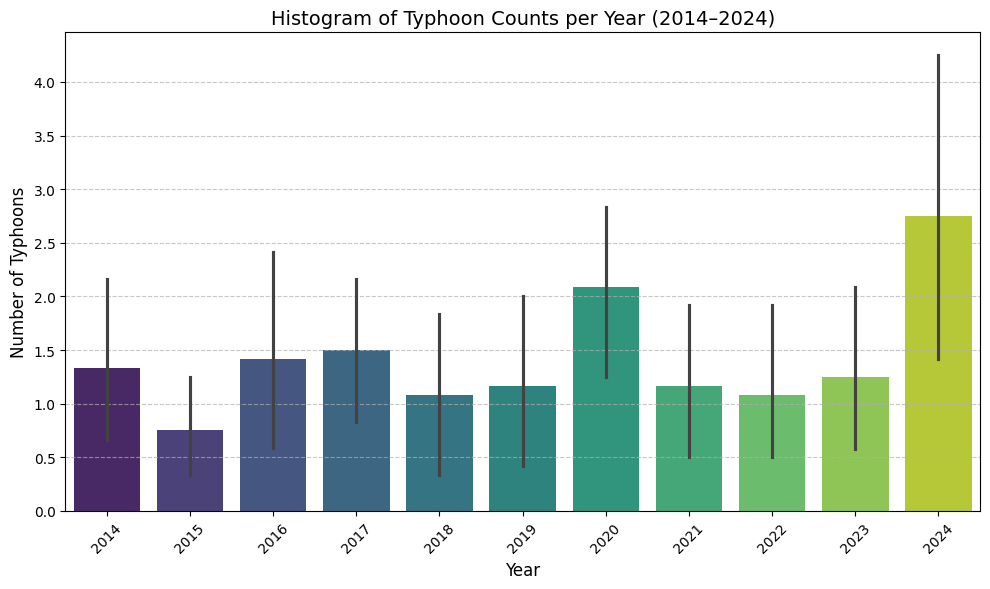

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x='Year', y='Number_of_Typhoons', data=data, palette='viridis')

plt.title("Histogram of Typhoon Counts per Year (2014–2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Typhoons", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# **2. KDE plot of monthly typhoon frequency.**

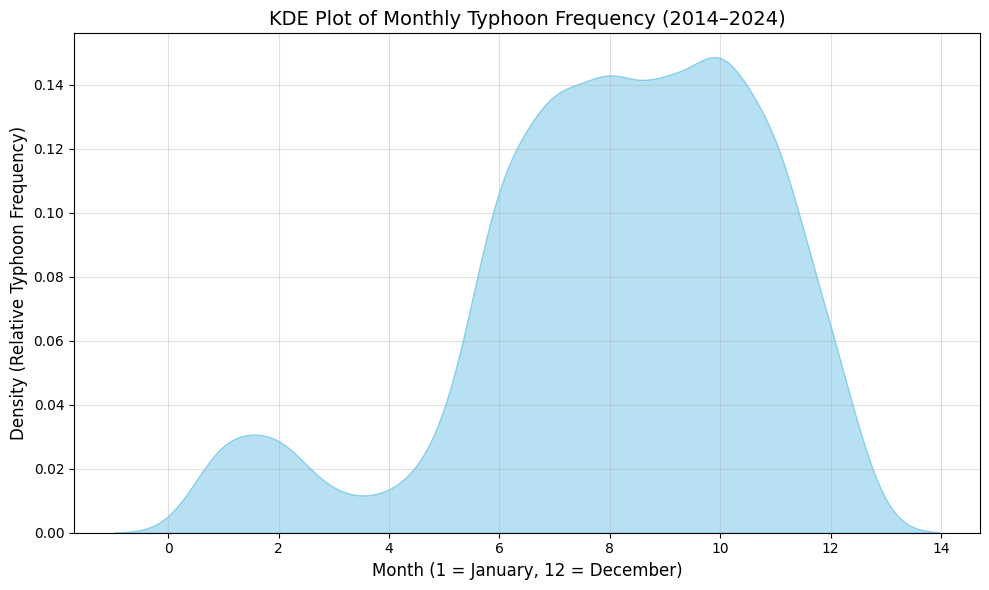

In [41]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=data, x='Month', weights='Number_of_Typhoons', fill=True, color='skyblue', alpha=0.6, bw_adjust=0.5)

plt.title("KDE Plot of Monthly Typhoon Frequency (2014–2024)", fontsize=14)
plt.xlabel("Month (1 = January, 12 = December)", fontsize=12)
plt.ylabel("Density (Relative Typhoon Frequency)", fontsize=12)
plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()

# **3. Scatter plot: month vs. typhoon count**

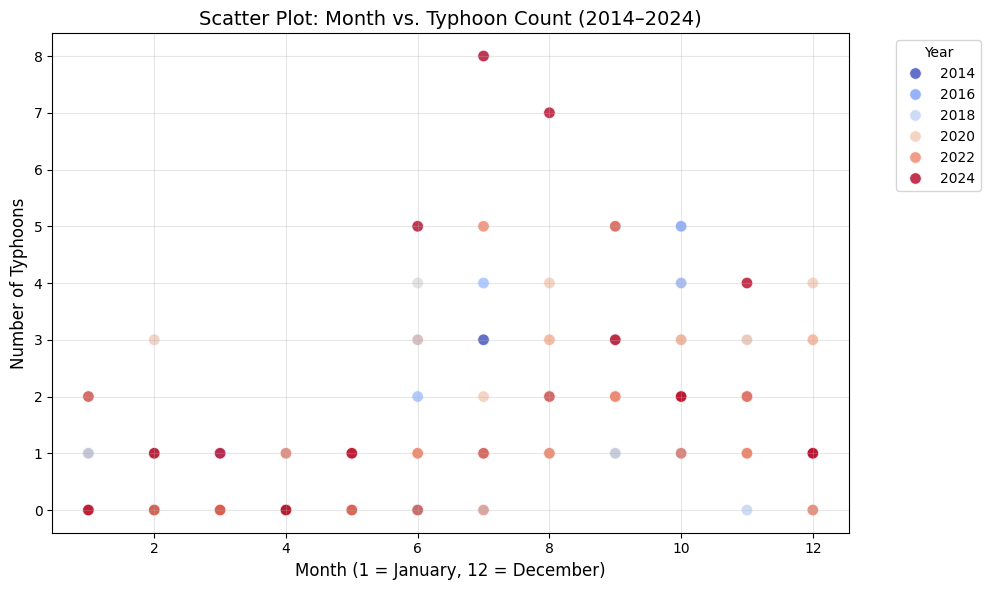

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data,
    x='Month',
    y='Number_of_Typhoons',
    hue='Year',               # Color points by year
    palette='coolwarm',
    s=70,
    alpha=0.8
)

plt.title("Scatter Plot: Month vs. Typhoon Count (2014–2024)", fontsize=14)
plt.xlabel("Month (1 = January, 12 = December)", fontsize=12)
plt.ylabel("Number of Typhoons", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# **4. Pairplot: number of typhoons, month, year**

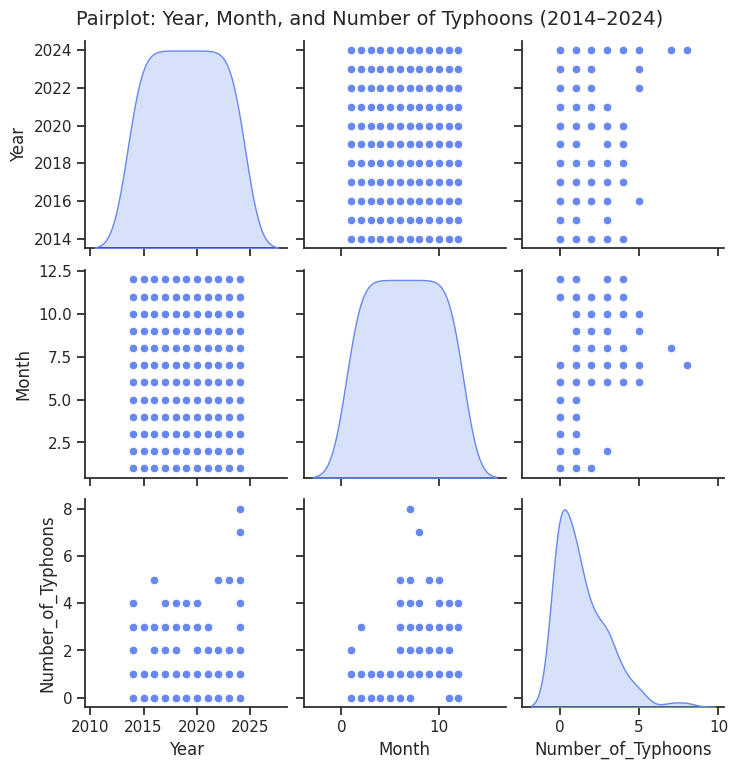

In [43]:
sns.set(style="ticks", palette="coolwarm")
pairplot = sns.pairplot(
    data[['Year', 'Month', 'Number_of_Typhoons']],
    diag_kind='kde',         # show KDE on diagonal instead of hist
    height=2.5
)

pairplot.fig.suptitle("Pairplot: Year, Month, and Number of Typhoons (2014–2024)", fontsize=14, y=1.02)
plt.show()

# **5. Correlation matrix of number of typhoons, month, year**

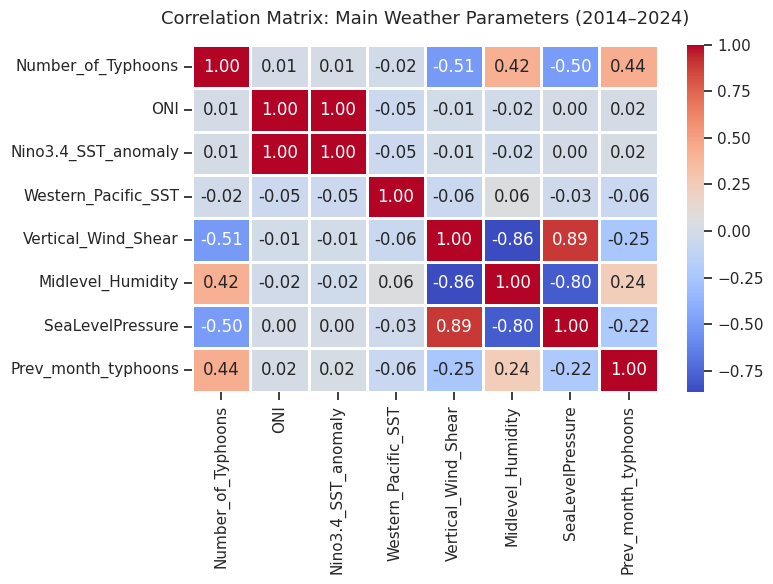

In [44]:
numeric_cols = ['Number_of_Typhoons', 'ONI', 'Nino3.4_SST_anomaly',
                'Western_Pacific_SST', 'Vertical_Wind_Shear',
                'Midlevel_Humidity', 'SeaLevelPressure', 'Prev_month_typhoons']

corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=1
)
plt.title("Correlation Matrix: Main Weather Parameters (2014–2024)", fontsize=13, pad=15)
plt.tight_layout()
plt.show()

#**6. Missingness Plot**: Checking for Missing Data

<Figure size 800x500 with 0 Axes>

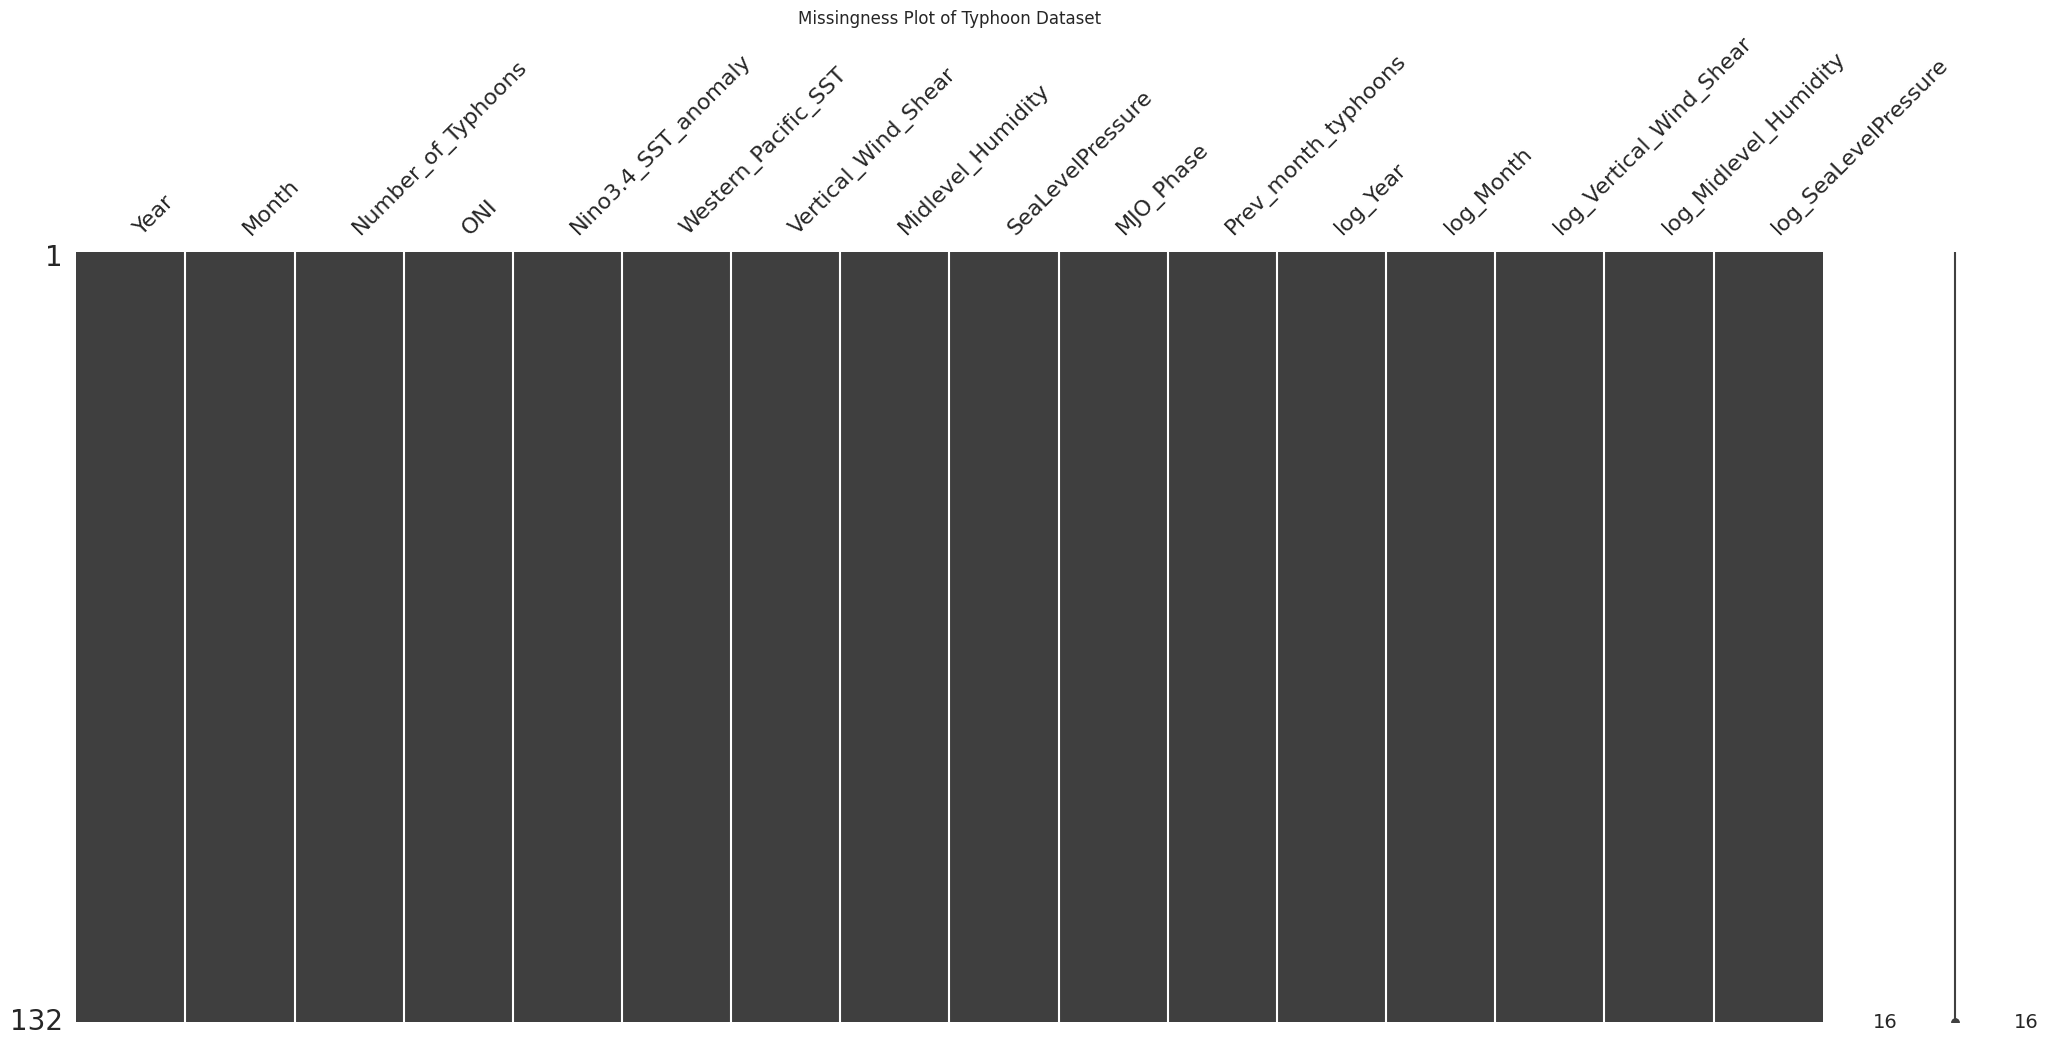

In [52]:
import missingno as msno
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
msno.matrix(data)
plt.title("Missingness Plot of Typhoon Dataset")
plt.show()


# 7. **Barplot** – Typhoon Counts per Season (Wet vs Dry)

/tmp/ipython-input-960996388.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Season', y='Number_of_Typhoons', estimator='sum', palette='coolwarm')


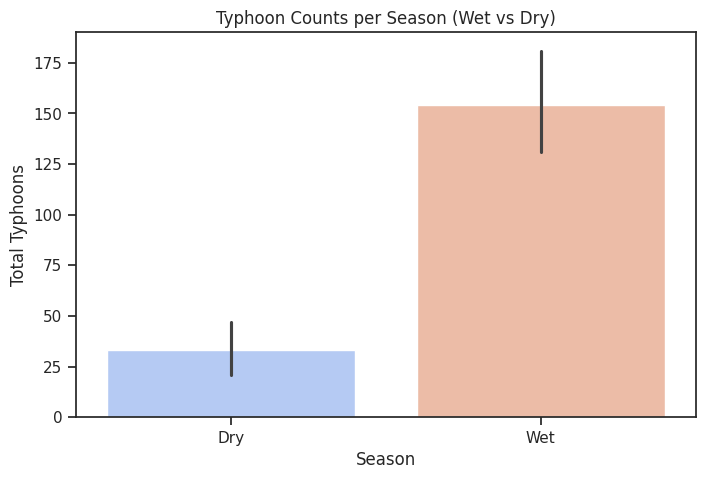

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create 'Season' column if not yet added
data['Season'] = data['Month'].apply(lambda x: 'Wet' if x in [6,7,8,9,10,11] else 'Dry')

plt.figure(figsize=(8,5))
sns.barplot(data=data, x='Season', y='Number_of_Typhoons', estimator='sum', palette='coolwarm')
plt.title('Typhoon Counts per Season (Wet vs Dry)')
plt.xlabel('Season')
plt.ylabel('Total Typhoons')
plt.show()


#8: **Boxplot** — Distribution per Month Across Years

/tmp/ipython-input-3621272437.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Month_Name', y='Number_of_Typhoons', palette='viridis')


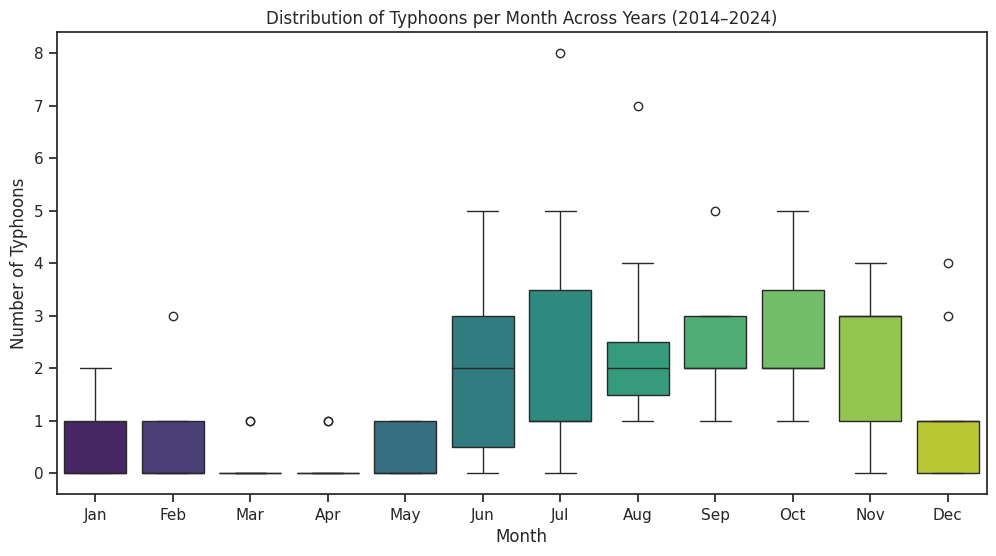

In [55]:
import calendar

data['Month_Name'] = data['Month'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='Month_Name', y='Number_of_Typhoons', palette='viridis')
plt.title('Distribution of Typhoons per Month Across Years (2014–2024)')
plt.xlabel('Month')
plt.ylabel('Number of Typhoons')
plt.show()


#9: **Line Plot** — Monthly Typhoon Counts Across 2014–2024

/tmp/ipython-input-508668389.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Year', y='Number_of_Typhoons', marker='o', ci=None)


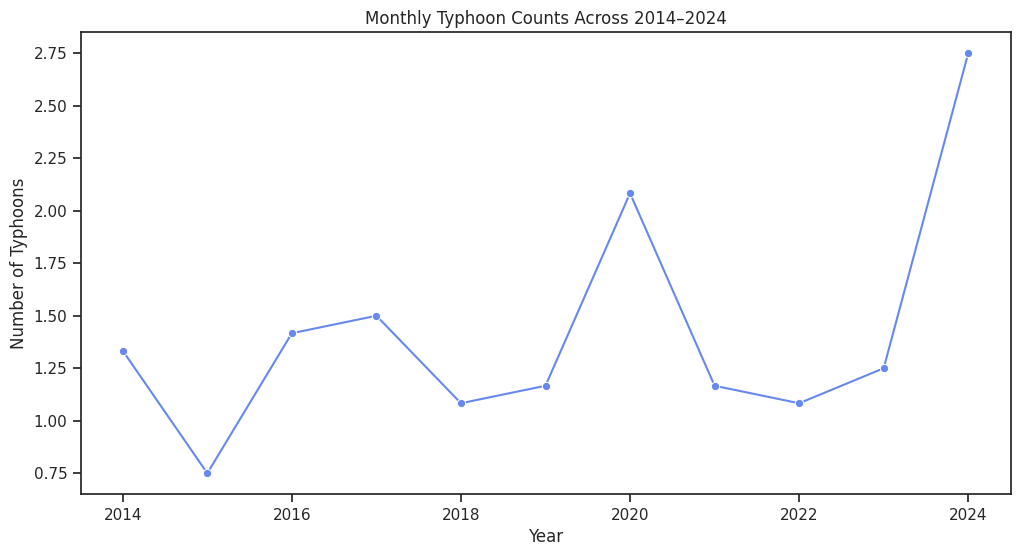

In [58]:
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='Year', y='Number_of_Typhoons', marker='o', ci=None)
plt.title('Monthly Typhoon Counts Across 2014–2024')
plt.xlabel('Year')
plt.ylabel('Number of Typhoons')
plt.show()


# 10: **Clustering** — Group Years by Typhoon Trends

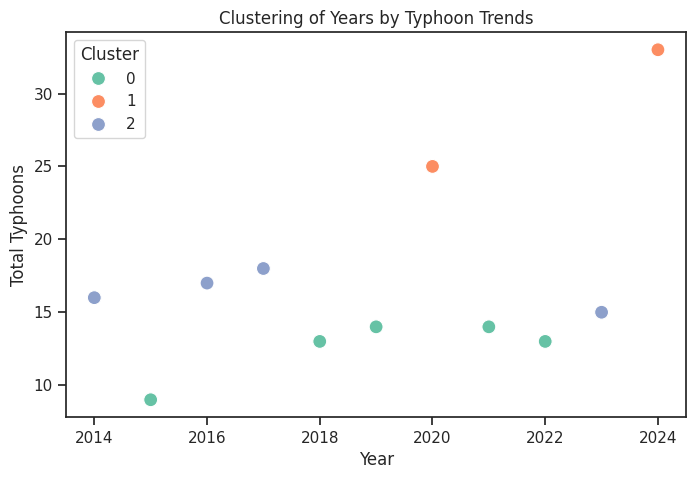

In [59]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate data by year
yearly = data.groupby('Year')['Number_of_Typhoons'].sum().reset_index()

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
yearly['Cluster'] = kmeans.fit_predict(yearly[['Number_of_Typhoons']])

# Plot clusters
plt.figure(figsize=(8,5))
sns.scatterplot(data=yearly, x='Year', y='Number_of_Typhoons', hue='Cluster', palette='Set2', s=100)
plt.title('Clustering of Years by Typhoon Trends')
plt.xlabel('Year')
plt.ylabel('Total Typhoons')
plt.show()
